In [27]:
# imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

from statsmodels.formula.api import ols
import statsmodels.api as sm

In [3]:
# read the dataset

df = pd.read_csv('D:/google data analytics/Project/Linear reg datasets/Salary.csv')

In [5]:
#display data
df.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [7]:
# check for null values

df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

This is a very simple dataset with only 2 variables. We are predicting Salary based on years of experience.

In [8]:
#assigning dependent and independent variables.
y = df['Salary']
X = df.drop(['Salary'],axis = 1)

In [15]:
# spliting the data for testing and training
# random state is used to reproduce the same output
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [16]:
# Training the model with training data

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

## Prediction

In [17]:
# prediction
lr_pred = lr_model.predict(X_test)
lr_pred

array([120057.87672477,  88127.64484315,  73456.99776241, 118331.91824468,
        97620.41648363,  71731.03928232,  63101.24688189])

In [18]:
# Actual Y values for the tested X values 
y_test

29    121872
20     91738
16     66029
28    122391
22    101302
15     67938
10     63218
Name: Salary, dtype: int64

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Salary', ylabel='Density'>

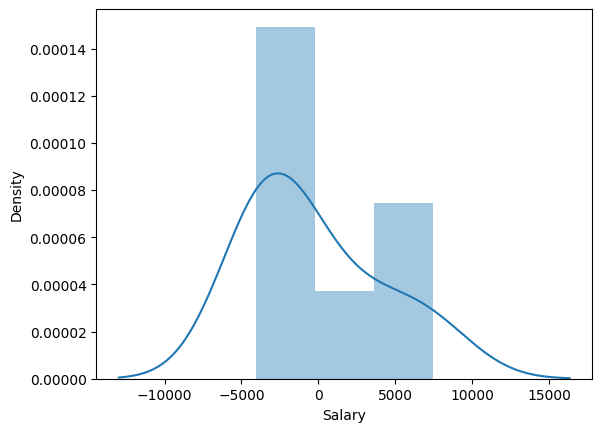

In [42]:
# plotting the residuals

sns.distplot(lr_pred - y_test)

Although the residuals are slightly skewed, the overall performance of the model looks good.

## Plotting the Best fit Graph

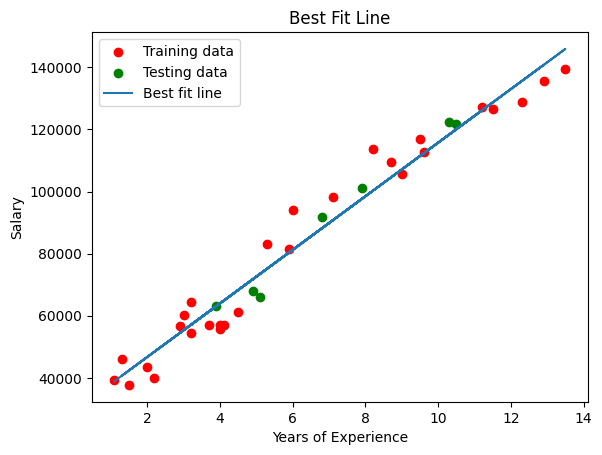

In [53]:
plt.scatter(X_train,y_train, color = 'red', label = 'Training data')
plt.scatter(X_test,y_test, color = 'green', label = 'Testing data')
plt.plot(X_train,lr_model.predict(X_train), label = 'Best fit line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title("Best Fit Line")
plt.legend()

## Metrics for the model

In [59]:
#r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("r2 score", round(r2_score(y_test,lr_pred),2))
print("MSE is", round(mean_squared_error(y_test,lr_pred),2))
print("MAE is ", round(mean_absolute_error(y_test,lr_pred),2))
print("RMSE is", round(np.sqrt(mean_squared_error(y_test,lr_pred)),2))

r2 score 0.97
MSE is 16561691.22
MAE is  3500.42
RMSE is 4069.61


In [30]:
# using OLS  for the same 

ols_formula = 'Salary ~ YearsExperience'

OLS = ols(formula = ols_formula, data = df)

model = OLS.fit()

model_results =  model.summary()

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     914.3
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.23e-25
Time:                        07:27:52   Log-Likelihood:                -353.66
No. Observations:                  35   AIC:                             711.3
Df Residuals:                      33   BIC:                             714.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.886e+04   2092.797     13.790      0.000    2.46e+04    3.31e+04
YearsExperience  8731.9410    288.783     30.237      0.000    8144.407    9319.475
==============================================================================
Omnibus:                        1.704   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.426   Jarque-Bera (JB):                1.498
Skew:                           0.372   Prob(JB):                        0.473
Kurtosis:                       2.313   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Accuracy of the model

print("Accuracy for testing data",round(lr_model.score(X_test,y_test),3))
print("Accuracy for training data",round(lr_model.score(X_train,y_train),3))

Accuracy for testing data 0.971
Accuracy for training data 0.964


In [66]:
#Predicting salary with random inputs
a = np.array([3])
new = a.reshape(-1,1)
lr_model.predict(new)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([55334.43372149])